In [ ]:
import numpy as np
import networkx as nx
from networkx.algorithms.traversal.depth_first_search import dfs_tree
import matplotlib.pyplot as plt

Задание 1. Константинов Даниил

Запись файла

In [ ]:
s = """<?xml version="1.0" encoding="UTF-8"?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns"  
  xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
  xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns
  http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph id="G" edgedefault="directed">
    <node id="n1"/>
    <node id="n2"/>
    <node id="n3"/>
    <node id="n4"/>
    <node id="n6"/>
    <node id="n7"/>
    <node id="n8"/>
    <node id="n9"/>
    <node id="n10"/>
    <node id="n11"/>
    <node id="n12"/>
    <node id="n13"/>
    <node id="n14"/>
    <node id="n15"/>
    <node id="n16"/>
    <node id="n17"/>
    <node id="n18"/>
    <node id="n19"/>
    <node id="n20"/>
    <node id="n21"/>
    <edge source="n1" target="n2"/>
    <edge source="n2" target="n3"/>
    <edge source="n3" target="n4"/>
    <edge source="n4" target="n5"/>
    <edge source="n1" target="n6"/>
    <edge source="n6" target="n7"/>
    <edge source="n7" target="n8"/>
    <edge source="n8" target="n9"/>
    <edge source="n6" target="n15"/>
    <edge source="n15" target="n16"/>
    <edge source="n15" target="n21"/>
    <edge source="n7" target="n17"/>
    <edge source="n8" target="n18"/>
    <edge source="n2" target="n10"/>
    <edge source="n10" target="n11"/>
    <edge source="n11" target="n12"/>
    <edge source="n10" target="n19"/>
    <edge source="n11" target="n20"/>
    <edge source="n3" target="n13"/>
    <edge source="n4" target="n14"/>
  </graph>
</graphml>"""
f = open("TEST4.xml", "w")
f.write(s)
f.close()

# HV-drawing

In [ ]:
# название файла
test_file='TEST4.xml'
# (graphml (вроде с этим форматом работает), xml)

In [ ]:
# вычисление размера поддерева
def len_subtree(graph, vertex):
    return len([i for i in dfs_tree(graph, vertex)])

# находим нужны корни поддеревьев
# g - graph
def find_subtrees(g, root):
    if len(g[root]) == 2:
        child1 = [i for i in g[root]][0]
        child2 = [i for i in g[root]][1]
        l1 = len_subtree(g, child1)
        l2 = len_subtree(g, child2)
        if l1 <= l2:
            return 2, [child1, child2]
        else:
            return 2, [child2, child1]
    elif len(g[root]) == 1:
        child = [i for i in g[root]][0]
        return 1, [child]
    else:
        return 0, []
    
def HV_horizontal(G, root):
    global x_coord, y_coord
    k, subtrees = find_subtrees(G, root)
    if k == 2:
        left_subtree_root, right_subtree_root = subtrees[0], subtrees[1]
        x_coord[left_subtree_root] = x_coord[root]
        y_coord[left_subtree_root] = y_coord[root] - 1
        
        x_max_right = HV_horizontal(G, left_subtree_root)
        
        x_coord[right_subtree_root] = x_max_right + 1
        y_coord[right_subtree_root] = y_coord[root] 
        return HV_horizontal(G, right_subtree_root)
    elif k == 1:
        left_subtree_root = subtrees[0]
        x_coord[left_subtree_root] = x_coord[root]
        y_coord[left_subtree_root] = y_coord[root] - 1
        return HV_horizontal(G, left_subtree_root)
    elif k == 0:
        return x_coord[root]

def HV_vertical(G, root):
    global x_coord, y_coord
    k, subtrees = find_subtrees(G, root)
    if k == 2:
        left_subtree_root, right_subtree_root = subtrees[0], subtrees[1]
        
        x_coord[right_subtree_root] = x_coord[root] + 1
        y_coord[right_subtree_root] = y_coord[root]
        
        y_min_left = HV_vertical(G, right_subtree_root)
        
        x_coord[left_subtree_root] = x_coord[root]
        y_coord[left_subtree_root] = y_min_left - 1
        return HV_vertical(G, left_subtree_root)
    elif k == 1:
        right_subtree_root = subtrees[0]
        x_coord[right_subtree_root] = x_coord[root] + 1
        y_coord[right_subtree_root] = y_coord[root]
        return HV_vertical(G, right_subtree_root)
    elif k == 0:
        return y_coord[root]

def HV_drawing_vert(G):
    global x_coord, y_coord
    root = [n for n, d in G.in_degree() if d==0][0]  # корень
    x_coord[root] = 0
    y_coord[root] = 0
    HV_vertical(G, root)
    return

def HV_drawing_horiz(G):
    global x_coord, y_coord
    root = [n for n, d in G.in_degree() if d==0][0]  # корень
    x_coord[root] = 0
    y_coord[root] = 0
    HV_horizontal(G, root)
    return

In [ ]:
# обработка файла
g_read = nx.read_graphml(test_file)
G = nx.DiGraph()
G.add_nodes_from(g_read.nodes())
G.add_edges_from(g_read.edges())

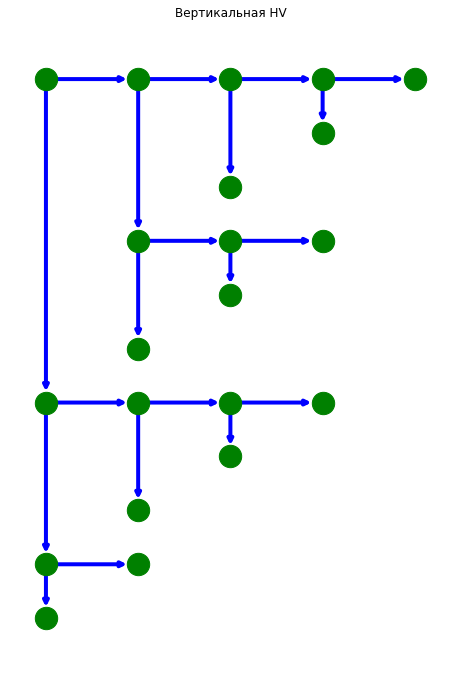

In [ ]:
x_coord = {v: 999 for v in G.nodes()}
y_coord = {v: 999 for v in G.nodes()}
HV_drawing_vert(G)
pos = {}
for v in G.nodes():
    pos[v] = [x_coord[v], y_coord[v]]
plt.figure(figsize=(8,12))
plt.title('Вертикальная HV')
width = 4  # ширина линий
node_size = 500  # размер узлов
nx.draw(G, pos=pos, with_labels=False, font_size=20, node_size=node_size, node_color='g', edge_color='b', width=width)
plt.savefig("HV_vertical.png")
plt.show()


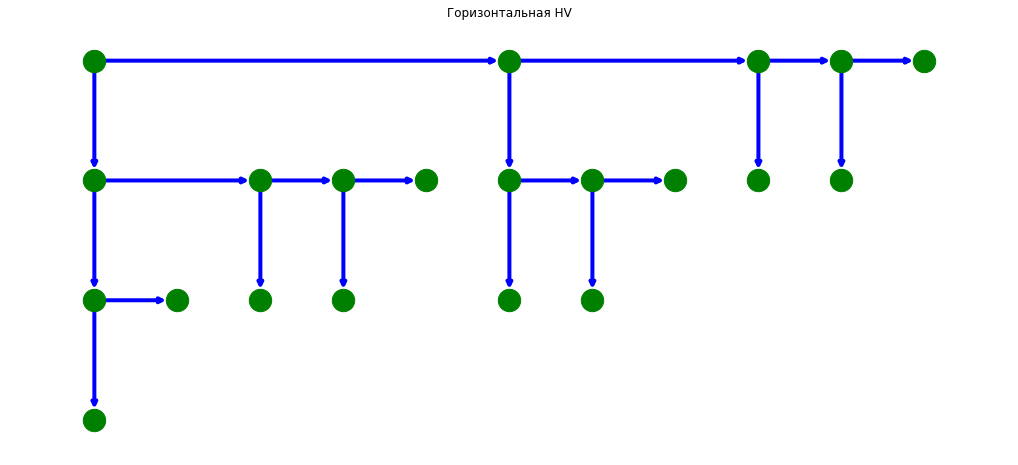

In [ ]:
x_coord = {v: 999 for v in G.nodes()}
y_coord = {v: 999 for v in G.nodes()}
HV_drawing_horiz(G)
pos = {}
for v in G.nodes():
    pos[v] = [x_coord[v], y_coord[v]]
plt.figure(figsize=(18,8))
plt.title('Горизонтальная HV')
width = 4  # ширина линий
node_size = 500  # размер узлов
nx.draw(G, pos=pos, with_labels=False, font_size=20, node_size=node_size, node_color='g', edge_color='b', width=width)
plt.savefig("HV_horizontal.png")
plt.show()

# Layered-tree-draw
## (работает и для небинарных деревьев, но плохо)

In [ ]:
# обход для y координат
def bfs():  
    used = {v: False for v in G.nodes() }
    dst = {v: -1 for v in G.nodes() }
    q = []
    q.append(root)
    used[root] = True
    dst[root] = 0
    
    while q:
        cur = q.pop(0)
        for neighbor in G[cur]:
            if not used[neighbor]:
                q.append(neighbor)
                used[neighbor] = True
                dst[neighbor] = dst[cur] + 1
    return dst

# обход для x координат
def visit(v):
    global d
    global x_coord
    children = [k for k in G[v].keys()]
    if len(children) == 1:        
        x_coord[v] = d
        visit(children[0])
        return
    if len(children) == 0:
        x_coord[v] = d
        d += 1
        return
    else:
        n = len(children) // 2
        for i in children[:n]:  # левое поддерево
            visit(i)
        x_coord[v] = d
        d += 1
        for i in children[n:]:  # правое поддерево
            visit(i)
    return

# эвристика: ставит вершину в центре относительно детей
def move_trees1(G, v):
    global x_coord
    children = [k for k in G[v].keys()]
    if len(children) >= 1:
        for child in children:
            move_trees1(G, child)
        children_x_coord = [x_coord[v] for v in children]
        x_coord[v] = 0.5 * (min(children_x_coord) + max(children_x_coord))
    return

# эвристика: если у вершины нет детей, приближаем ее к соседу
def move_trees2(G, v):
    global x_coord
    children = {k : x_coord[k] for k in G[v].keys()}
    children = {k : v for k, v in sorted(children.items(), key=lambda item: item[1])}  # отсрортировали по x_coord
    ch_array = [k for k in children]
    if len(children) >= 2:
        for i, child in enumerate(children):
            x_len = len([v for v in G[child].keys() ]) # сколько детей у ребенка
            if x_len == 0:   # если у ребенка нет детей
    
                if i == 0 and abs(x_coord[child] - x_coord[ch_array[i+1]]) > 1:
                    x_coord[child] = x_coord[ch_array[i+1]] - 1
                elif i == len(children) - 1 and abs(x_coord[child] - x_coord[ch_array[i-1]]) > 1:
                    x_coord[child] = x_coord[ch_array[i-1]] + 1
                elif i > 0 and i < len(children) - 1:
                    if abs(x_coord[child] - x_coord[ch_array[i+1]]) > 1:
                        x_coord[child] = x_coord[ch_array[i+1]] - 1
    for child in children:
        move_trees2(G, child)
    return

In [ ]:
# название файла
test_file='TEST4.xml'

In [ ]:
# обработка графа
g_read = nx.read_graphml(test_file)
G = nx.DiGraph()
G.add_nodes_from(g_read.nodes())
G.add_edges_from(g_read.edges())

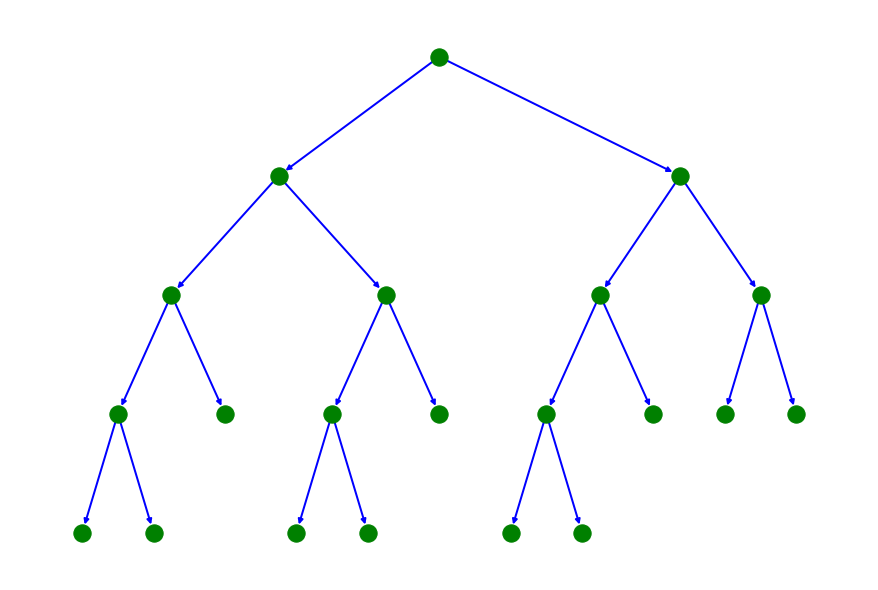

In [ ]:
root = [n for n, d in G.in_degree() if d==0][0] # корень
d = 0
x_coord = {v: 0 for v in G.nodes()}
visit(root)
y_coord = bfs()

# перевернем координаты y для визуализации
new_y = max(y_coord.values())
new_y_coord = y_coord.copy()
for i in range(0, max(y_coord.values()) + 1):
    for key in list(new_y_coord):
        if y_coord[key] == i:
            y_coord[key] = new_y
            del new_y_coord[key] 
    new_y -= 1

move_trees1(G, root)
#move_trees2(G, root) 

pos = {}
x_coord[root] = max([x_coord[v] for v in x_coord]) / 2
for v in G.nodes():
    pos[v] = [x_coord[v], y_coord[v]]

# возможно, нужно настроить размер отобржения графа
plt.figure(figsize=(12,8))
width = 2  # ширина линий
node_size = 300  # размер узлов
nx.draw(G, pos=pos, with_labels=False, font_size=20, node_size=node_size, node_color='g', edge_color='b', width=width)
plt.savefig("Layered_tree_draw.png")
plt.show()